In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Load Dataset

In [4]:
df = pd.read_csv('Iris.csv')

In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


### Exploratory Data Analysis (EDA)

#### Data Overview

In [7]:
df.shape

(150, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

#### Univariate Analysis

##### Histograms

In [13]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

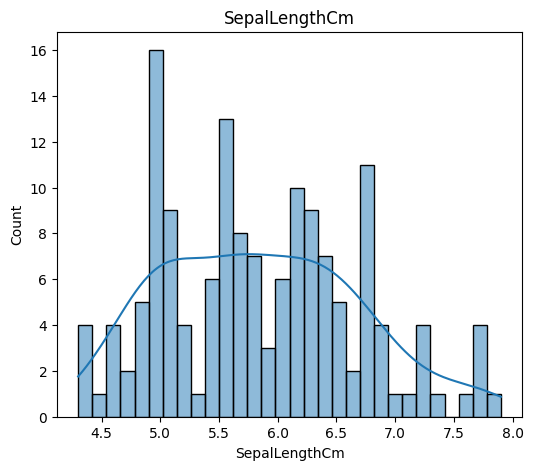

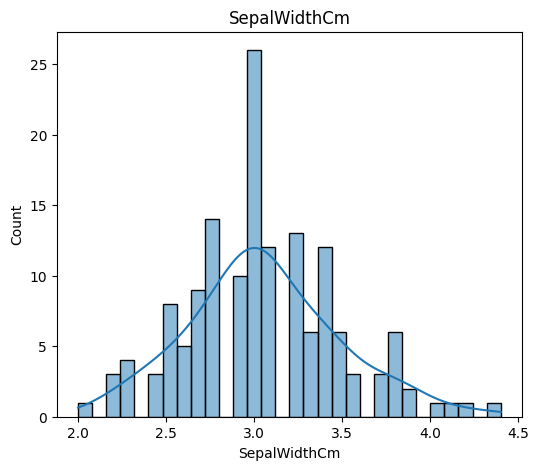

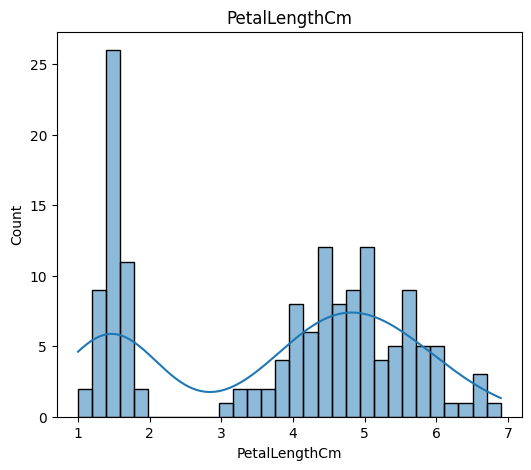

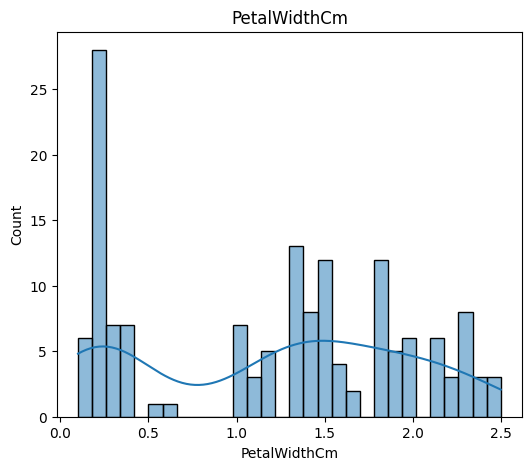

In [15]:
for feature in ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',]:
    plt.figure(figsize=(6,5))
    plt.title(feature)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.show()
    print("\n")

##### Heatmap

In [16]:
corr = df.select_dtypes(include=['float64']).corr()

<Axes: >

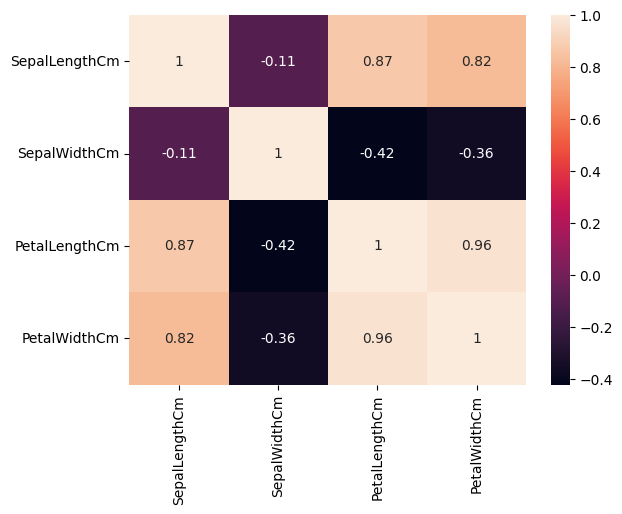

In [17]:
sns.heatmap(corr, annot=True)

#### Pairplot

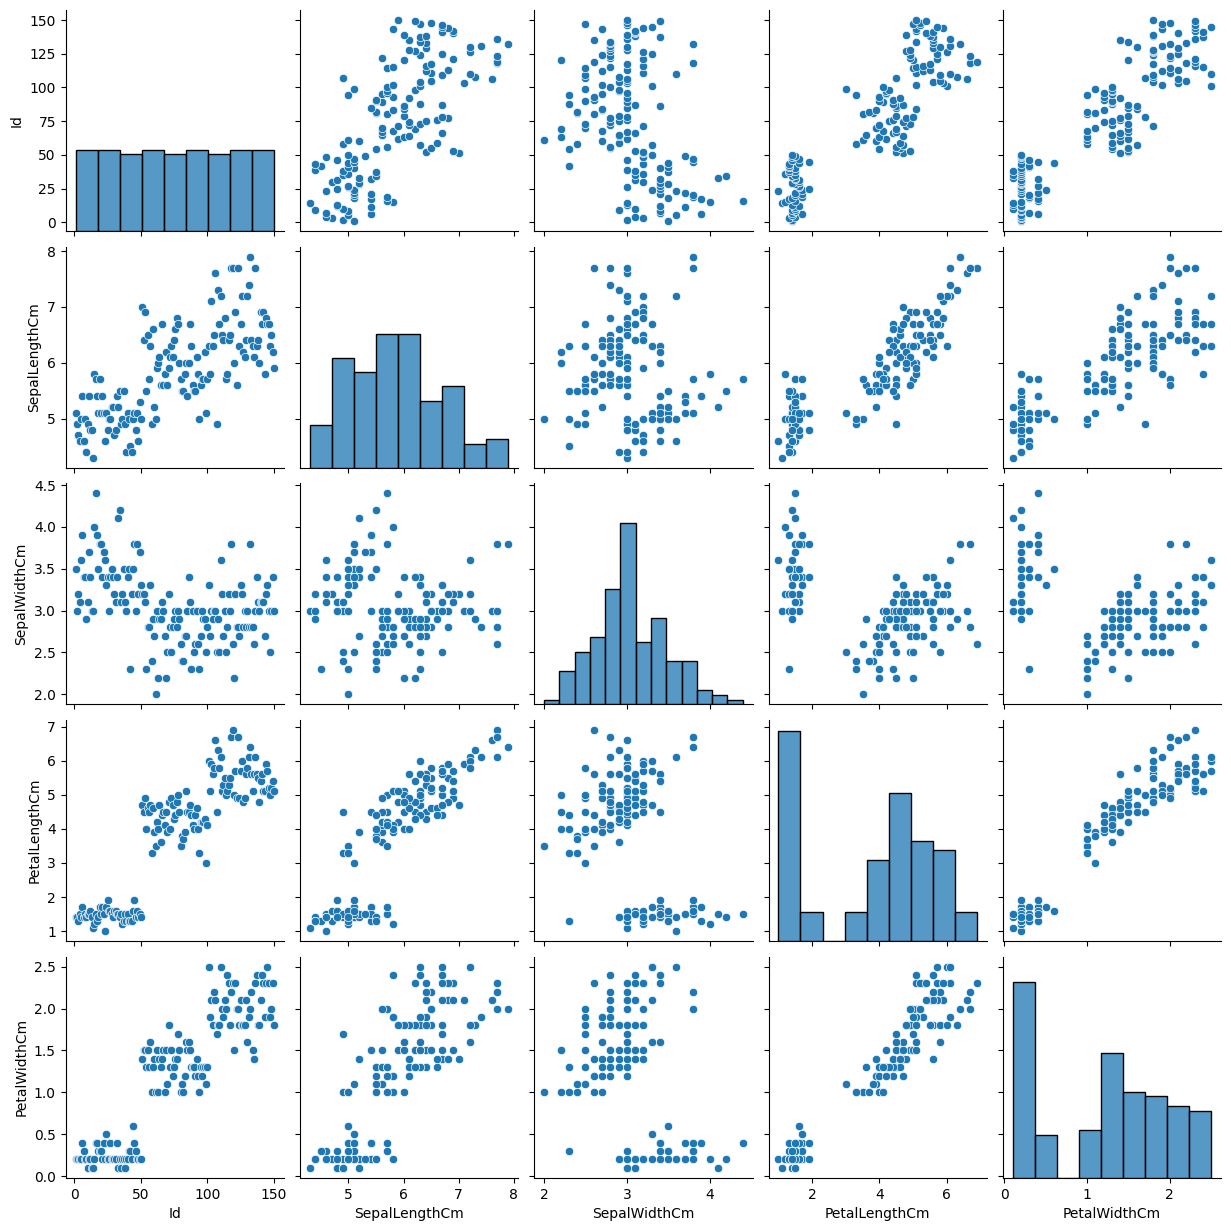

In [18]:
sns.pairplot(df)

#### Data Preprocessing

In [19]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [21]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
 

In [22]:
df['Species']=encoder.fit_transform(df['Species'])

In [23]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [25]:
df['Species'].value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

In [26]:
encoder.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

#### Train-Test Split

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [29]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [31]:
X_train.shape, X_test.shape

((120, 4), (30, 4))

#### Feature Scaling

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [34]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [42]:
model = LogisticRegression(max_iter=300)

In [43]:
model.fit(X_train_scaled, y_train)
y_pred_train = model.predict(X_test_scaled)
y_pred_test = model.predict(X_test_scaled)
acc_train = model.score(X_test, y_test)


c:\Python Soft\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [47]:
acc_test = accuracy_score(y_test, y_pred_test)
acc_test

1.0

#### Predicting custom values

In [48]:
custom_data = np.array([[6.3, 3.3, 6.0, 2.5]])

In [53]:
custom_pred = model.predict(scaler.transform(custom_data))
decoded_pred = encoder.inverse_transform(custom_pred)

c:\Python Soft\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [54]:
print(f"Predicted Species: {decoded_pred[0]}")

Predicted Species: Iris-virginica
